<a href="https://colab.research.google.com/github/NaziMikhelashvili/IA/blob/main/IA_Nazi_Mikhelashvili.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is making it easier than ever to integrate powerful Generative AI capabilities into your projects. We are launching public preview for a simple and intuitive Python library (google.colab.ai) to access state-of-the-art language models directly within Colab environments. All users have free access to most popular LLMs, while paid users have access to a wider selection of models. This means users can spend less time on configuration and set up and more time bringing their ideas to life. With just a few lines of code, you can now perform a variety of tasks:
- Generate text
- Translate languages
- Write creative content
- Categorize text

Happy Coding!


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Загрузка датасета из кейса 21 и очистка данных

In [ ]:
import pandas as pd

добавила данные в формате CSV из 4 файлов кейса и удалила нерелевантные для анализа столбцы

In [ ]:

df1 = pd.read_csv('/content/Territories.csv')
# Удаление ненужных столбцов
df1.drop(columns=['RegionImage', 'Region Info'], inplace=True)
# Проверка на наличие дубликатов
print("Количество дубликатов:", df1.duplicated().sum())
# Удаление дубликатов
df1_no_duplicates = df1.drop_duplicates()
print("Количество строк после удаления дубликатов:", df1_no_duplicates.shape[0])
df1_no_duplicates.head(5)

Количество дубликатов: 0
Количество строк после удаления дубликатов: 11


,SalesTerritoryKey,Region,Country,Group
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [ ]:

df2 = pd.read_csv('/content/Sales.csv')
df2.drop(columns=['PromotionKey', 'SalesOrderLineNumber'], inplace=True)
print("Количество дубликатов:", df2.duplicated().sum())
df2_no_duplicates = df2.drop_duplicates()
print("Количество строк после удаления дубликатов:", df2_no_duplicates.shape[0])
# преобразование данных в корректный формат
df2_no_duplicates['SalesAmount'] = df2_no_duplicates['SalesAmount'].str.replace(',', '', regex=False)
df2_no_duplicates['SalesAmount'] = df2_no_duplicates['SalesAmount'].astype(float)
df2_no_duplicates['UnitPrice'] = df2_no_duplicates['UnitPrice'].str.replace(',', '', regex=False)
df2_no_duplicates['UnitPrice'] = df2_no_duplicates['UnitPrice'].astype(float)
df2_no_duplicates['TotalProductCost'] = df2_no_duplicates['TotalProductCost'].str.replace(',', '', regex=False)
df2_no_duplicates['TotalProductCost'] = df2_no_duplicates['TotalProductCost'].astype(float)
df2_no_duplicates['TaxAmt'] = df2_no_duplicates['TaxAmt'].astype(float)
df2_no_duplicates['OrderDate'] = pd.to_datetime(df2_no_duplicates['OrderDate'])
df2_no_duplicates['ShipDate'] = pd.to_datetime(df2_no_duplicates['ShipDate'])
df2_no_duplicates.head(5)

Количество дубликатов: 0
Количество строк после удаления дубликатов: 58189


,ProductKey,OrderDate,ShipDate,CustomerKey,SalesTerritoryKey,SalesOrderNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,2014-01-08,21768,6,SO43697,2,1789.14,2171.29,3578.27,286.26
1,346,2014-01-01,2014-01-08,28389,7,SO43698,2,1700.00,1912.15,3399.99,272.00
2,346,2014-01-01,2014-01-08,25863,1,SO43699,2,1700.00,1912.15,3399.99,272.00
3,336,2014-01-01,2014-01-08,14501,4,SO43700,2,349.55,413.15,699.10,55.93
4,346,2014-01-01,2014-01-08,11003,9,SO43701,2,1700.00,1912.15,3399.99,272.00


In [ ]:
df3 = pd.read_csv('/content/Product.csv')
df3.drop(columns=['DaysToManufacture','ProductLine','StartDate','Photo'], inplace=True)
print("Количество дубликатов:", df3.duplicated().sum())
df3_no_duplicates = df3.drop_duplicates()
print("Количество строк после удаления дубликатов:", df3_no_duplicates.shape[0])
df3_no_duplicates.head(5)
df3_no_duplicates['ListPrice'] = df3_no_duplicates['ListPrice'].str.replace(',', '', regex=False)
df3_no_duplicates['ListPrice'] = df3_no_duplicates['ListPrice'].astype(float)
df3_no_duplicates['StandardCost'] = df3_no_duplicates['StandardCost'].str.replace(',', '', regex=False)
df3_no_duplicates['StandardCost'] = df3_no_duplicates['StandardCost'].astype(float)
df3_no_duplicates = df3_no_duplicates.sort_values("Category")
df3_no_duplicates.head(10)

Количество дубликатов: 0
Количество строк после удаления дубликатов: 606


,ProductKey,ProductName,SubCategory,Category,StandardCost,Color,ListPrice,ModelName,ProductDescription
503,539,ML Road Tire,Tires and Tubes,Accessories,9.35,NaN,24.99,ML Road Tire,Higher density rubber.
426,451,Headlights - Dual-Beam,Lights,Accessories,14.43,NaN,34.99,Headlights - Dual-Beam,Rechargeable dual-beam headlight.
425,450,Taillights - Battery-Powered,Lights,Accessories,5.77,NaN,13.99,Taillight,Affordable light for safe night riding - uses ...
424,449,Mountain Pump,Pumps,Accessories,10.31,NaN,24.99,Mountain Pump,Simple and light-weight. Emergency patches sto...
423,448,Minipump,Pumps,Accessories,8.25,NaN,19.99,Minipump,Designed for convenience. Fits in your pocket....
422,447,Cable Lock,Locks,Accessories,10.31,NaN,25.00,Cable Lock,"Wraps to fit front and rear tires, carrier and..."
492,528,Mountain Tire Tube,Tires and Tubes,Accessories,1.87,NaN,4.99,Mountain Tire Tube,Self-sealing tube.
427,452,Headlights - Weatherproof,Lights,Accessories,18.56,NaN,44.99,Headlights - Weatherproof,Rugged weatherproof headlight.
493,529,Road Tire Tube,Tires and Tubes,Accessories,1.49,NaN,3.99,Road Tire Tube,Conventional all-purpose tube.
499,535,LL Mountain Tire,Tires and Tubes,Accessories,9.35,NaN,24.99,LL Mountain Tire,"Comparible traction, less expensive wire bead ..."


In [ ]:
df4 = pd.read_csv('/content/Customer.csv')
print("Количество дубликатов:", df4.duplicated().sum())
df4.drop(columns=['TotalChildren','HouseOwnerFlag','NumberCarsOwned','NumberChildrenAtHome', 'AddressLine1','CustomerStateCode', 'CustomerState','FirstName', 'LastName'], inplace=True)
df4_no_duplicates = df4.drop_duplicates()
print("Количество строк после удаления дубликатов:", df4_no_duplicates.shape[0])
df4_no_duplicates['BirthDate'] = pd.to_datetime(df4_no_duplicates['BirthDate'])
df4_no_duplicates['DateFirstPurchase'] = pd.to_datetime(df4_no_duplicates['DateFirstPurchase'])
df4_no_duplicates['YearlyIncome'] = df4_no_duplicates['YearlyIncome'].str.replace(',', '', regex=False)
df4_no_duplicates['YearlyIncome'] = df4_no_duplicates['YearlyIncome'].astype(float)
df4_no_duplicates.head(5)

Количество дубликатов: 0
Количество строк после удаления дубликатов: 18484


,CustomerKey,FullName,BirthDate,MaritalStatus,Gender,YearlyIncome,Education,Occupation,DateFirstPurchase,CommuteDistance,CustomerCity,CustomerCountry
0,11000,"Yang, Jon",1966-04-08,M,M,90000.0,Bachelors,Professional,2005-07-22,1-2 Miles,Rockhampton,Australia
1,11001,"Huang, Eugene",1965-05-14,S,M,60000.0,Bachelors,Professional,2005-07-18,0-1 Miles,Seaford,Australia
2,11002,"Torres, Ruben",1965-08-12,M,M,60000.0,Bachelors,Professional,2005-07-10,2-5 Miles,Hobart,Australia
3,11003,"Zhu, Christy",1968-02-15,S,F,70000.0,Bachelors,Professional,2005-07-01,5-10 Miles,North Ryde,Australia
4,11004,"Johnson, Elizabeth",1968-08-08,S,F,80000.0,Bachelors,Professional,2005-07-26,1-2 Miles,Wollongong,Australia


объединение по общемe идентификатору - исключаем территории и клиентов, по которым не было продаж

In [ ]:
df=df1_no_duplicates.merge(df2_no_duplicates).sort_values('SalesTerritoryKey')
df=df.merge(df3_no_duplicates).sort_values('ProductKey')
df=df.merge(df4_no_duplicates).sort_values('CustomerKey')
df.drop(columns=['SalesTerritoryKey', 'ProductKey'], inplace=True)
df = df.sort_values("SalesOrderNumber")
df['Month'] = df['ShipDate'].dt.month
df['Year'] = df['ShipDate'].dt.year
# Вывод общей информации о данных
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 58189 entries, 10111 to 50030
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Region              58189 non-null  object        
 1   Country             58189 non-null  object        
 2   Group               58189 non-null  object        
 3   OrderDate           58189 non-null  datetime64[ns]
 4   ShipDate            58189 non-null  datetime64[ns]
 5   CustomerKey         58189 non-null  int64         
 6   SalesOrderNumber    58189 non-null  object        
 7   OrderQuantity       58189 non-null  int64         
 8   UnitPrice           58189 non-null  float64       
 9   TotalProductCost    58189 non-null  float64       
 10  SalesAmount         58189 non-null  float64       
 11  TaxAmt              58189 non-null  float64       
 12  ProductName         58189 non-null  object        
 13  SubCategory         58189 non-null  object     

,Region,Country,Group,OrderDate,ShipDate,CustomerKey,SalesOrderNumber,OrderQuantity,UnitPrice,TotalProductCost,...,Gender,YearlyIncome,Education,Occupation,DateFirstPurchase,CommuteDistance,CustomerCity,CustomerCountry,Month,Year
10111,Canada,Canada,North America,2014-01-01,2014-01-08,21768,SO43697,2,1789.14,2171.29,...,M,70000.0,Bachelors,Management,2005-07-01,10+ Miles,Metchosin,Canada,1,2014
12425,France,France,Europe,2014-01-01,2014-01-08,28389,SO43698,2,1700.00,1912.15,...,F,20000.0,High School,Manual,2005-07-01,0-1 Miles,Pantin,France,1,2014
12439,Northwest,United States,North America,2014-01-01,2014-01-08,25863,SO43699,2,1700.00,1912.15,...,F,40000.0,High School,Professional,2005-07-01,10+ Miles,Lebanon,United States,1,2014
12054,Southwest,United States,North America,2014-01-01,2014-01-08,14501,SO43700,2,349.55,413.15,...,M,80000.0,Graduate Degree,Management,2005-07-01,1-2 Miles,Beverly Hills,United States,1,2014
12436,Australia,Australia,Pacific,2014-01-01,2014-01-08,11003,SO43701,2,1700.00,1912.15,...,F,70000.0,Bachelors,Professional,2005-07-01,5-10 Miles,North Ryde,Australia,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52865,Australia,Australia,Pacific,2016-12-30,2017-01-07,13650,SO74145,1,2384.07,1481.94,...,M,110000.0,Partial High School,Management,2007-01-12,10+ Miles,North Sydney,Australia,1,2017
55855,Australia,Australia,Pacific,2016-12-30,2017-01-07,26916,SO74146,1,539.99,343.65,...,F,10000.0,Partial College,Manual,2007-04-04,2-5 Miles,Rockhampton,Australia,1,2017
57777,Australia,Australia,Pacific,2016-12-30,2017-01-07,27473,SO74147,1,539.99,343.65,...,M,20000.0,Partial High School,Clerical,2007-06-11,5-10 Miles,Warrnambool,Australia,1,2017
38635,Australia,Australia,Pacific,2016-12-30,2017-01-07,27473,SO74147,1,53.99,41.57,...,M,20000.0,Partial High School,Clerical,2007-06-11,5-10 Miles,Warrnambool,Australia,1,2017


Разведочный анализ данных (EDA)

Количество заказов по категориям Category
Accessories    34319
Bikes          15205
Clothing        8665
Name: count, dtype: int64


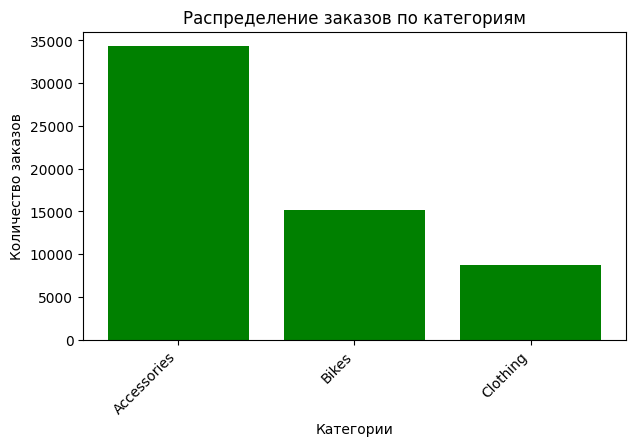

In [ ]:
category_counts = df['Category'].value_counts()
print("Количество заказов по категориям", category_counts)
plt.figure(figsize=(7,4))
plt.bar(category_counts.index, category_counts.values, color='green')
plt.title("Распределение заказов по категориям")
plt.xlabel("Категории")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.show()

Количество заказов по группе стран Group
North America    27666
Europe           17551
Pacific          12972
Name: count, dtype: int64


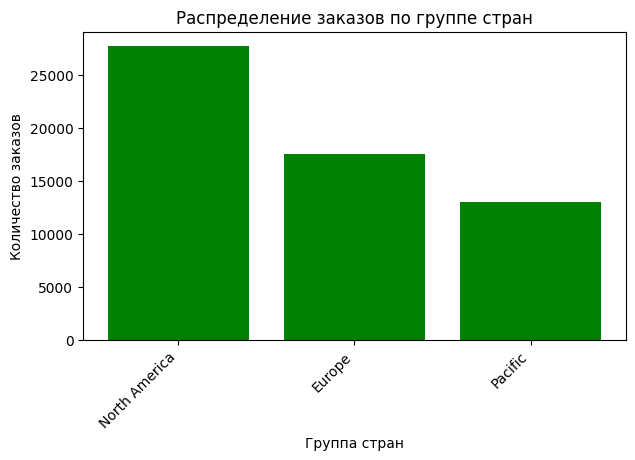

In [ ]:
category_counts = df['Group'].value_counts()
print("Количество заказов по группе стран", category_counts)
plt.figure(figsize=(7,4))
plt.bar(category_counts.index, category_counts.values, color='green')
plt.title("Распределение заказов по группе стран")
plt.xlabel("Группа стран")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.show()

Количество заказов по странам Country
United States     20524
Australia         12972
Canada             7142
United Kingdom     6709
Germany            5460
France             5382
Name: count, dtype: int64


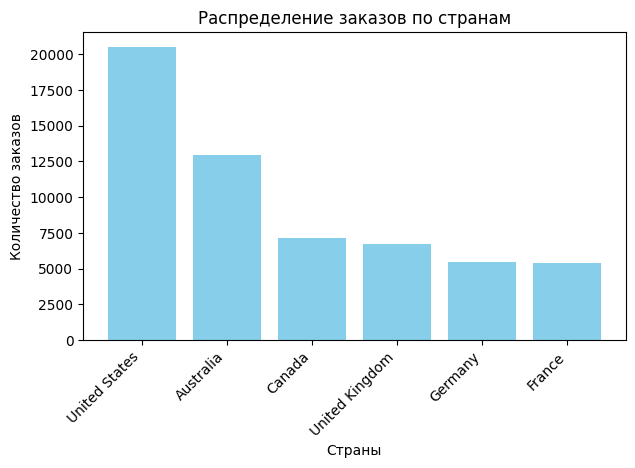

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

country_counts = df['Country'].value_counts()
print("Количество заказов по странам", country_counts)
plt.figure(figsize=(7,4))
plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.title("Распределение заказов по странам")
plt.xlabel("Страны")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0.5, 1.0, 'Частота заказов по категориям')

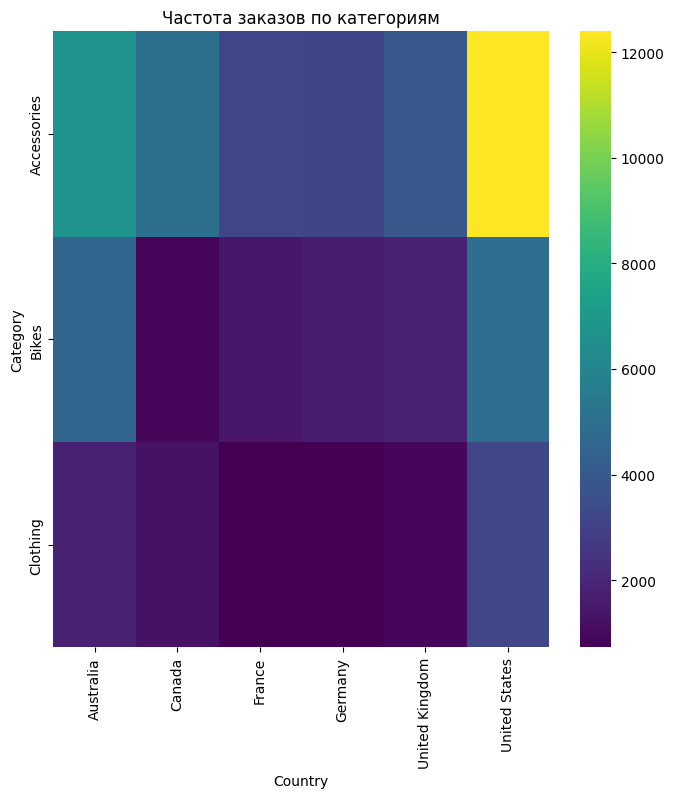

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Category'].value_counts()
    for x_label, grp in df.groupby('Country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country')
_ = plt.ylabel('Category')
plt.title("Частота заказов по категориям и странам")

Text(0.5, 0, 'Количество')

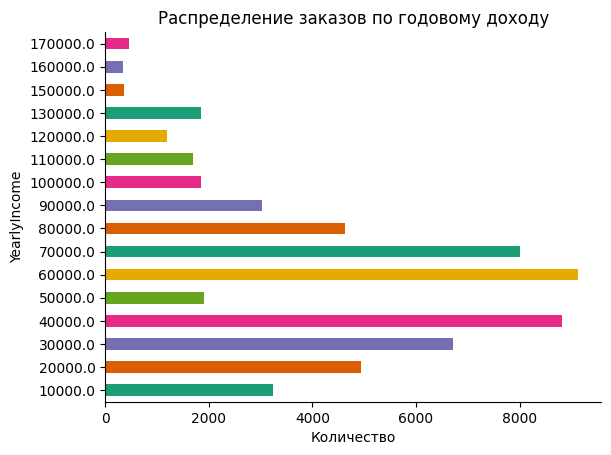

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('YearlyIncome').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title("Распределение заказов по годовому доходу")
plt.xlabel("Количество")


Text(0.5, 1.0, 'Распределение заказов по половой принадлежности и занятости')

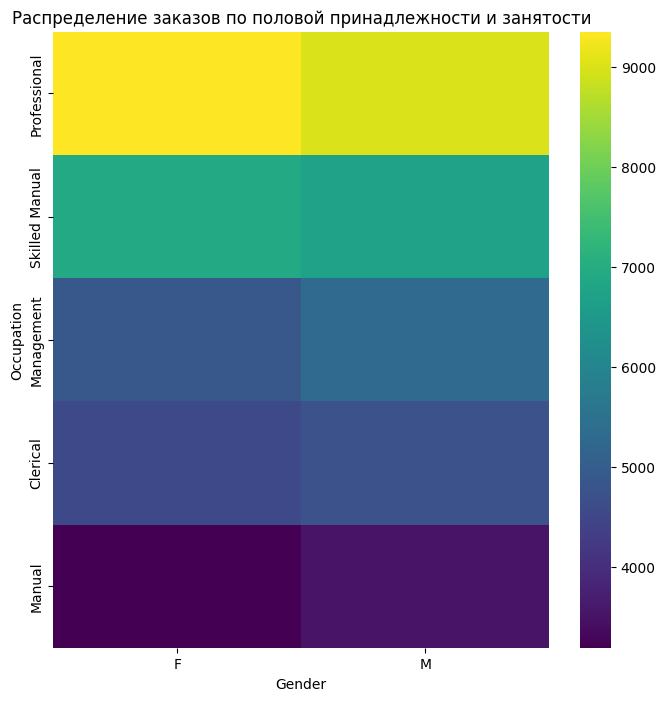

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Occupation'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Occupation')

plt.title("Распределение заказов по половой принадлежности и занятости")

Text(0.5, 1.0, 'Распределение заказов по годам и цветам')

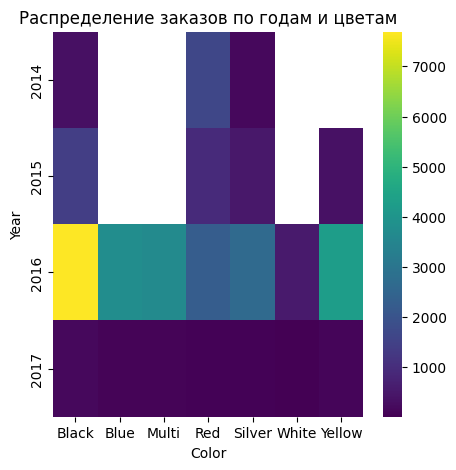

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(5, 5))
df_2dhist = pd.DataFrame({
    x_label: grp['Year'].value_counts()
    for x_label, grp in df.groupby('Color')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Color')
_ = plt.ylabel('Year')
plt.title("Распределение заказов по годам и цветам")

Text(0.5, 1.0, 'Частота заказов по категориям и странам')

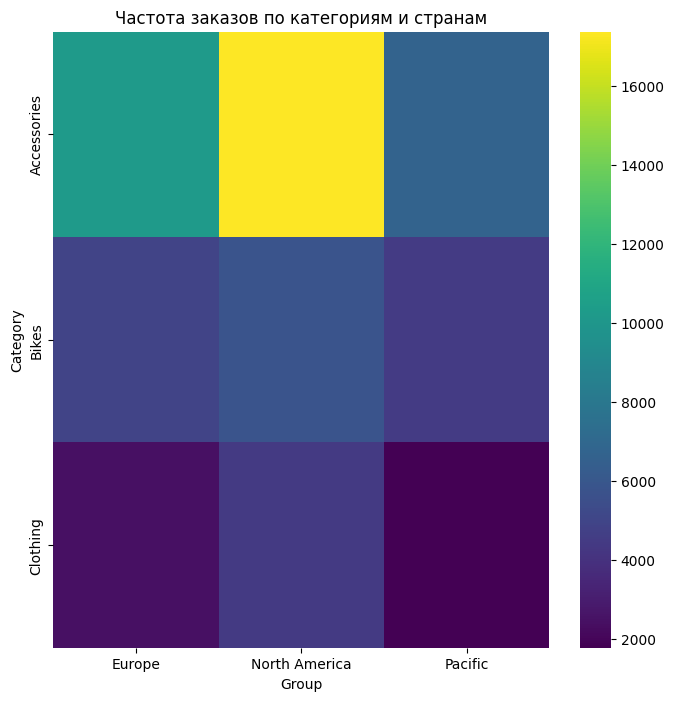

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Category'].value_counts()
    for x_label, grp in df.groupby('Group')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Group')
_ = plt.ylabel('Category')
plt.title("Частота заказов по категориям и странам")

ABC-XYZ Анализ

ABC-разбиение по категориям:
 A: 34319 Accesories
 B: 15205 Bikes
 C: 8665 Clothing

XYZ-разбиение по группам страна:
 X: 27666 заказов в North America
 Y: 17551 заказов в Europe
 Z: 12972 заказов в Pacific


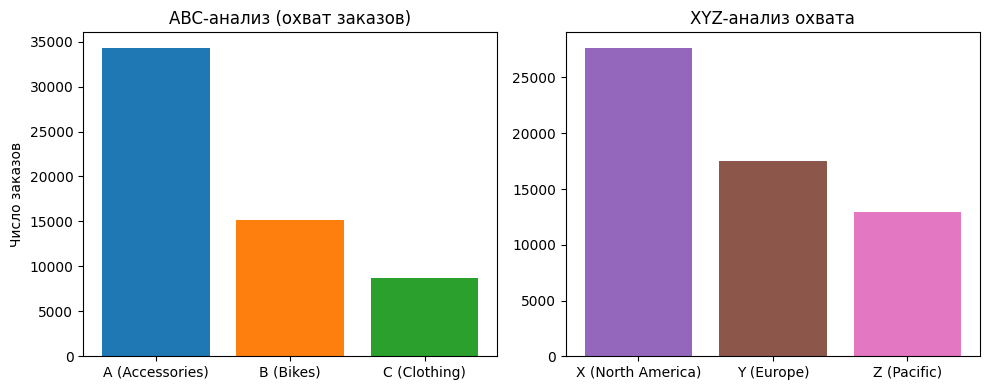

In [ ]:
import numpy as np

# ABC категории:
category = df['Category']
A_category = category[category == 'Accessories'].count()
B_category = category[category == 'Bikes'].count()
C_category = category[category == 'Clothing'].count()

print(f"ABC-разбиение по категориям:\n A: {A_category} Accesories\n B: {B_category} Bikes\n C: {C_category} Clothing")

# XYZ категории:
group =df['Group']
X_group = group[group == 'North America'].count()
Y_group = group[group == 'Europe'].count()
Z_group = group[group == 'Pacific'].count()

print(f"\nXYZ-разбиение по группам страна:\n X: {X_group} заказов в North America\n Y: {Y_group} заказов в Europe\n Z: {Z_group} заказов в Pacific")
df['North America'] = np.where(df['Group'] == 'North America', 1, 0)
df['Europe'] = np.where(df['Group'] == 'Europe', 1, 0)
df['Pacific'] = np.where(df['Group'] == 'Pacific', 1, 0)

# Визуализация ABC vs XYZ распределения
labels_abc = ['A (Accessories)', 'B (Bikes)', 'C (Clothing)']
counts_abc = [A_category, B_category, C_category]

labels_xyz = ['X (North America)', 'Y (Europe)', 'Z (Pacific)']
counts_xyz = [X_group, Y_group, Z_group]

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].bar(labels_abc, counts_abc, color=['#1f77b4','#ff7f0e','#2ca02c'])
axes[0].set_title("ABC-анализ (охват заказов)")
axes[0].set_ylabel("Число заказов")

axes[1].bar(labels_xyz, counts_xyz, color=['#9467bd','#8c564b','#e377c2'])
axes[1].set_title("XYZ-анализ охвата")

plt.tight_layout()
plt.show()


RFM-АНАЛИЗ

In [ ]:
df5=df.merge(df2_no_duplicates).sort_values('CustomerKey')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date,timedelta
today = dt.datetime(2024, 1, 1)
# 1. RFM-анализ
rfm_df = df.groupby('CustomerKey').agg({
    'OrderDate': lambda x: (today - x.max()).days, # Recency (давность)
    'CustomerKey': 'count',                            # Frequency (частота)
    'SalesAmount': 'sum'                              # Monetary (сумма)
})

# Переименование столбцов для ясности
rfm_df.rename(columns={'OrderDate': 'Recency',
                       'CustomerKey': 'Frequency',
                       'SalesAmount': 'Monetary'}, inplace=True)


# 2. Присвоение RFM-баллов
# Создаем сегменты и присваиваем баллы (чем выше балл, тем лучше)
# Можно использовать более сложные методы, но для примера - простые квантили
r_labels = range(1, 5) # например, от 1 до 4
f_labels = range(1, 5) # например, от 1 до 4
m_labels = range(1, 5) # например, от 1 до 4

rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=r_labels, duplicates='drop')
rfm_df['F'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=f_labels, duplicates='drop')
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=4, labels=m_labels, duplicates='drop')

# 3. Объединение баллов в общую RFM-сумму
rfm_df['RFM_Score'] = rfm_df['R'].astype(int) + rfm_df['F'].astype(int) + rfm_df['M'].astype(int)

# 4. Сегментация клиентов (пример)
# В реальной ситуации этот метод будет более детальным и основываться на значениях RFM_Score
# Например, R=1 и F=1 - самые неактивные, R=4 и F=4 - самые активные
rfm_df['Segment'] = 'Other' # Значение по умолчанию
rfm_df.loc[(rfm_df['R'] >= 3) & (rfm_df['F'] >= 3) & (rfm_df['M'] >= 3), 'Segment'] = 'Champions'
rfm_df.loc[(rfm_df['R'] >= 3) & (rfm_df['F'] >= 3) & (rfm_df['M'] < 3), 'Segment'] = 'Loyal Customers'
# ... и так далее для других сегментов

rfm_df=rfm_df.sort_values('RFM_Score')
print(rfm_df)


             Recency  Frequency  Monetary  R  F  M  RFM_Score    Segment
CustomerKey                                                             
25851           2582          1     24.99  1  1  1          3      Other
13796           2614          2     39.98  1  1  1          3      Other
19847           2599          1     21.98  1  1  1          3      Other
17178           2570          2     13.98  1  1  1          3      Other
23043           2566          1     29.99  1  1  1          3      Other
...              ...        ...       ... .. .. ..        ...        ...
11004           2800          6   8196.01  4  4  4         12  Champions
11005           2799          6   8121.33  4  4  4         12  Champions
11007           2843          8   8211.00  4  4  4         12  Champions
11000           2798          8   8248.99  4  4  4         12  Champions
20150           2823          6   3264.02  4  4  4         12  Champions

[17918 rows x 8 columns]
